
# 2017 NHTS Data Competition

## Improving Commute Time with Data Analysis

### Authors: Bonny Nyaga, P.E. and Walter Yu, P.E.

### Abstract

The average commute time within each U.S. census division has a large impact on its economy, productivity, infrastructure and environment. Longer commute times cause lost wages for workers with longer commute times, additional wearing of highway infrastructure and environmental impacts. As a result, this study evaluates commute patterns with the NHTS dataset$^{1}$ and whether public transportation or additional transportation planning could reduce commute times based on data analysis.

### Introduction

This study outlines the data, methods and results used to identify commute patterns. Specifically, it seeks to answer the following questions:

1. Which are the census divisions with the most trips per household$^{2}$?
2. What are the average commute distance and time within those divisions?
3. Could public transportation or transportation planning reduce commute times?
4. What are some recommendations for improving commute times based on demographic data$^{3}$?

### NHTS Data Analysis

This study analyzes the households, trips and vehicles tables of the NHTS dataset to evaluate commute trends by census division. Specifically, the tables were analyzed to evaluate average commute distance and time.

### Tools and Process

The tools and process listed below were used to analyze data and provide recommendations:

1. Jupyter Notebook - Exploratory data analysis and visualization were completed using this notebook.
2. Python Modules - The modules listed below will need to be installed in order to run this notebook:

  * Pandas
  * NumPy
  * SciPy
  * Seaborn
  * Matplotlib
  * StatsModels
  * Scikit-Learn

### Data Cleaning and Preparation

Data cleaning was completed prior to analysis; as a result, the datasets were cleaned to minimize the impact of outlier, missing or repeated values as follows:

1. Replaced empty and missing values since they may cause errors during analysis.
2. Removed negative values since they may skew summary statistics and results.
3. Removed outlier values by removing values greater or less than 3 standard deviations from the mean since they will skew results. Specifically, outlier values will skew summary statistics such as the mean, median and standard deviation.

After data cleaning, the household, trip and vehicle tables were sorted by census district to begin the analysis.

### Household Count by Division

The weighted household count was calculated to identify the following:

1. Which divisions have the most households?
2. How do household count differ between divisions with and without subway systems?
3. Are there any other noticeable trends based on chart plot?

As a result, household count was plotted in the chart below with the following observations:

1. Total Count: The Pacific and Atlantic divisions had the highest count while the Central divisions; this trend is intuitive given that many costal states have higher populations than those in the midwest.
2. Subway Systems: The Pacific and Atlantic had more households with access to a subway system then those which did not have access; however, the Central divisions had more households without access to a subway system than those which did have access.
3. Subway Access: The trend observed above implies that the Pacific and Atlantic regions may have more urban areas with more households centered around transportation hubs instead of more rural or equal distribution of the population as in the Central divisions.
4. In general, household count is highest in the Pacific and Atlantic divisions with a higher percentage of households having access to a subway system whereas household count is lower the Central divisions with lower percentage of households having access to a subway system.

In [2]:
import csv
import pandas as pd
import numpy as np
import scipy
from scipy import stats
pd.options.mode.chained_assignment = None

# Plotting packages; documentation consulted for examples:
# Reference: https://seaborn.pydata.org/examples/index.html
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 7.5)

# Statistics packages
import statsmodels
from statsmodels.formula.api import ols

# Image import packages
from IPython.display import Image
from IPython.core.display import HTML

# Load trash volume data
hhpub = pd.DataFrame.from_csv('./data/hhpub.csv', index_col=None)
perpub = pd.DataFrame.from_csv('./data/perpub.csv', index_col=None)
trippub = pd.DataFrame.from_csv('./data/trippub.csv', index_col=None)
vehpub = pd.DataFrame.from_csv('./data/vehpub.csv', index_col=None)

# Drop all zero values
hhpub.loc[hhpub.WTHHFIN > 0]
trippub.loc[trippub.WTTRDFIN > 0]

# Remove outliers which are not within 3 standard deviations from mean
hhpub = hhpub[
    np.abs(hhpub.WTHHFIN - hhpub.WTHHFIN.mean()) <= (3*hhpub.WTHHFIN.std())
]
trippub = trippub[
    np.abs(trippub.WTTRDFIN - trippub.WTTRDFIN.mean()) <= (3*trippub.WTTRDFIN.std())
]

# Drop null values since they do not contribute to total
hhpub.dropna(subset=['HOUSEID'], inplace=True)
hhpub.dropna(subset=['HHSTATE'], inplace=True)
hhpub.dropna(subset=['WTHHFIN'], inplace=True)
hhpub.dropna(subset=['CDIVMSAR'], inplace=True)
trippub.dropna(subset=['HOUSEID'], inplace=True)
trippub.dropna(subset=['WTTRDFIN'], inplace=True)
trippub.dropna(subset=['CDIVMSAR'], inplace=True)
perpub.dropna(subset=['CDIVMSAR'], inplace=True)
vehpub.dropna(subset=['ANNMILES'], inplace=True)

# NHTS HH and trip data by division, weighted total and subway
hh_21 = hhpub.loc[hhpub['CDIVMSAR'] == 21]
hh_22 = hhpub.loc[hhpub['CDIVMSAR'] == 22]
hh_31 = hhpub.loc[hhpub['CDIVMSAR'] == 31]
hh_32 = hhpub.loc[hhpub['CDIVMSAR'] == 32]
hh_51 = hhpub.loc[hhpub['CDIVMSAR'] == 51]
hh_52 = hhpub.loc[hhpub['CDIVMSAR'] == 52]
hh_62 = hhpub.loc[hhpub['CDIVMSAR'] == 62]
hh_63 = hhpub.loc[hhpub['CDIVMSAR'] == 63]
hh_91 = hhpub.loc[hhpub['CDIVMSAR'] == 91]
hh_92 = hhpub.loc[hhpub['CDIVMSAR'] == 92]

print('Script done running!')

Script done running!


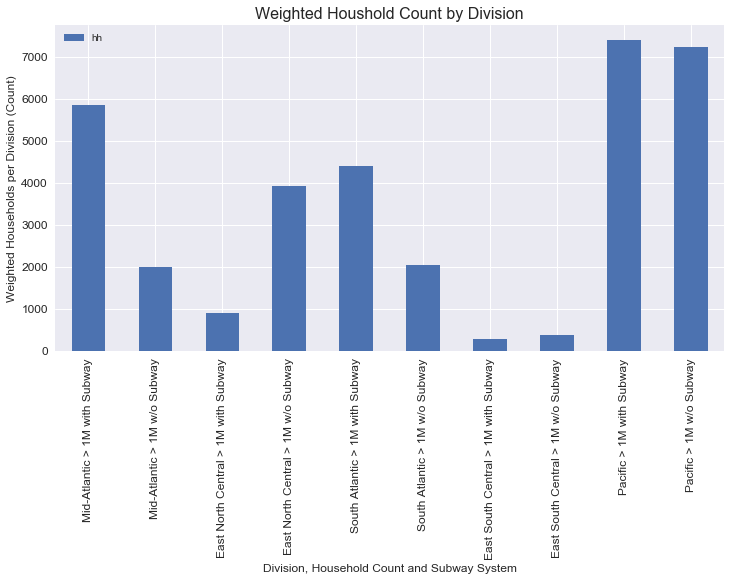

In [6]:
hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'hh': [
        5865,
        1989,
        904,
        3932,
        4404,
        2048,
        275,
        376,
        7394,
        7245
    ]
}
hh_divisions_plot = pd.DataFrame(
    hh_divisions,
    columns = ['division', 'hh']
)

# Create bar chart for trips by division
ax = hh_divisions_plot['hh'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Weighted Houshold Count by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Weighted Households per Division (Count)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Average Weighted Trips per Household by Census Divisions

The average trips per household by division were calculated to identify commute trends; as a result, the household table was sorted for census divisions as follows:

1. Selected census divisions with the 5 highest total of weighted households per the NHTS codebook.
2. Divisions were further sorted by ones with and without subway system.
3. The households identified in these divisions were then matched with trips.
4. The weighted trip values within each division were totaled, then divided by total households.
5. Result was average weighted trips per household by division.

The divisions identified with highest total weight households were as follows:

1. Mid-Atlantic > 1M with Subway
2. Mid-Atlantic > 1M w/o Subway
3. East North Central > 1M with Subway
4. East North Central > 1M w/o Subway
5. South Atlantic > 1M with Subway
6. South Atlantic > 1M w/o Subway
7. East South Central > 1M with Subway
8. East South Central > 1M w/o Subway
9. Pacific > 1M with Subway
10. Pacific > 1M w/o Subway

The results were plotted in the chart below with the following observations:

1. Trip Count: Total trip count was higher in all divisions with access to a subway system than those without access. This trend implies that households with access to a subway system tend to be more densely populated and result in higher trip count.
2. Trip Count Distribution: Trip count were distributed evenly between divisions despite household count differences which may be due to weight ranking or household formation (larger or smaller size).

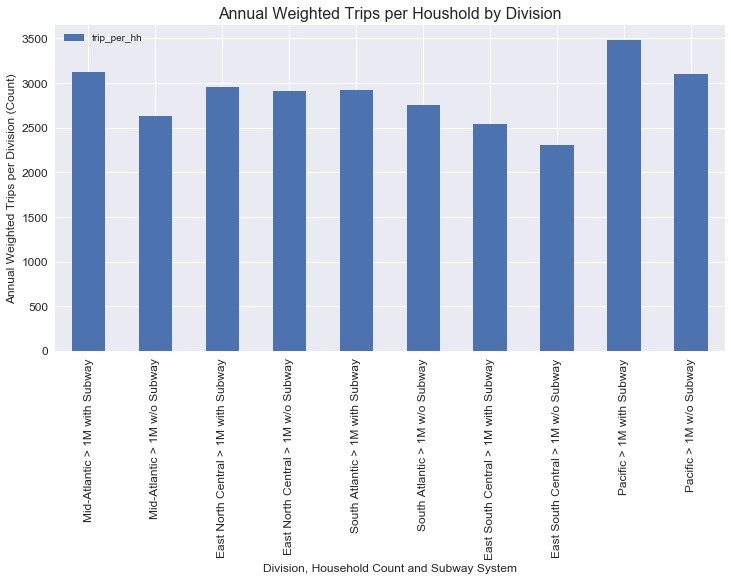

In [7]:
# Sum all weighted households by division
hh_21_weight_sum = hh_21['WTHHFIN'].sum()
hh_22_weight_sum = hh_22['WTHHFIN'].sum()
hh_31_weight_sum = hh_31['WTHHFIN'].sum()
hh_32_weight_sum = hh_32['WTHHFIN'].sum()
hh_51_weight_sum = hh_51['WTHHFIN'].sum()
hh_52_weight_sum = hh_52['WTHHFIN'].sum()
hh_62_weight_sum = hh_62['WTHHFIN'].sum()
hh_63_weight_sum = hh_63['WTHHFIN'].sum()
hh_91_weight_sum = hh_91['WTHHFIN'].sum()
hh_92_weight_sum = hh_92['WTHHFIN'].sum()

# Join NHTS trip with HH data to analyze total weighted trips per HH
tr_hh_21 = pd.merge(trippub, hh_21, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_22 = pd.merge(trippub, hh_22, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_31 = pd.merge(trippub, hh_31, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_32 = pd.merge(trippub, hh_32, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_51 = pd.merge(trippub, hh_51, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_52 = pd.merge(trippub, hh_52, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_62 = pd.merge(trippub, hh_62, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_63 = pd.merge(trippub, hh_63, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_91 = pd.merge(trippub, hh_91, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_92 = pd.merge(trippub, hh_92, left_on='HOUSEID', right_on='HOUSEID')

# NHTS trip data by division and weighted total
tr_21_weight_sum = tr_hh_21['WTTRDFIN'].sum()
tr_22_weight_sum = tr_hh_22['WTTRDFIN'].sum()
tr_31_weight_sum = tr_hh_31['WTTRDFIN'].sum()
tr_32_weight_sum = tr_hh_32['WTTRDFIN'].sum()
tr_51_weight_sum = tr_hh_51['WTTRDFIN'].sum()
tr_52_weight_sum = tr_hh_52['WTTRDFIN'].sum()
tr_62_weight_sum = tr_hh_62['WTTRDFIN'].sum()
tr_63_weight_sum = tr_hh_63['WTTRDFIN'].sum()
tr_91_weight_sum = tr_hh_91['WTTRDFIN'].sum()
tr_92_weight_sum = tr_hh_92['WTTRDFIN'].sum()

# Calculate weighted trip per household by division
tr_per_hh_21 = tr_21_weight_sum / hh_21_weight_sum
tr_per_hh_22 = tr_22_weight_sum / hh_22_weight_sum
tr_per_hh_31 = tr_31_weight_sum / hh_31_weight_sum
tr_per_hh_32 = tr_32_weight_sum / hh_32_weight_sum
tr_per_hh_51 = tr_51_weight_sum / hh_51_weight_sum
tr_per_hh_52 = tr_52_weight_sum / hh_52_weight_sum
tr_per_hh_62 = tr_62_weight_sum / hh_62_weight_sum
tr_per_hh_63 = tr_63_weight_sum / hh_63_weight_sum
tr_per_hh_91 = tr_91_weight_sum / hh_91_weight_sum
tr_per_hh_92 = tr_92_weight_sum / hh_92_weight_sum

# Create dataframe for trips by division
tr_hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'trip_per_hh': [
        tr_per_hh_21,
        tr_per_hh_22,
        tr_per_hh_31,
        tr_per_hh_32,
        tr_per_hh_51,
        tr_per_hh_52,
        tr_per_hh_62,
        tr_per_hh_63,
        tr_per_hh_91,
        tr_per_hh_92
    ]
}
tr_hh_divisions_plot = pd.DataFrame(tr_hh_divisions, columns = ['division', 'trip_per_hh'])

# Create bar chart for trips by division
ax = tr_hh_divisions_plot[['trip_per_hh']].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Annual Weighted Trips per Houshold by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Annual Weighted Trips per Division (Count)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Annual Miles per Household by Census Divisions

The average miles per household by division were calculated to identify commute trends; as a result, the vehicle table was sorted as follows:

1. The households within each selected division were matched with vehicle values.
2. The annual miles for each joined value were totaled, then divided by total households.
3. Result was average annual miles per household by division.

Results were plotted in chart below with the following observations:

1. Total Miles: Total miles traveled were lower in divisions with access to a subway system than those without access to one (except for the South-Atlantic which had slightly higher miles traveled). This implies that more residents may be taking the subway and reducing the number of miles traveled.
2. Pacific/Atlantic Divisions: These divisions showed the largest decrease in miles traveled with access to a subway system than those without access. This implies that subway systems in more urban/densely populated divisions may reduce the total number of miles traveled and minimize impacts to the environment and infrastructure.

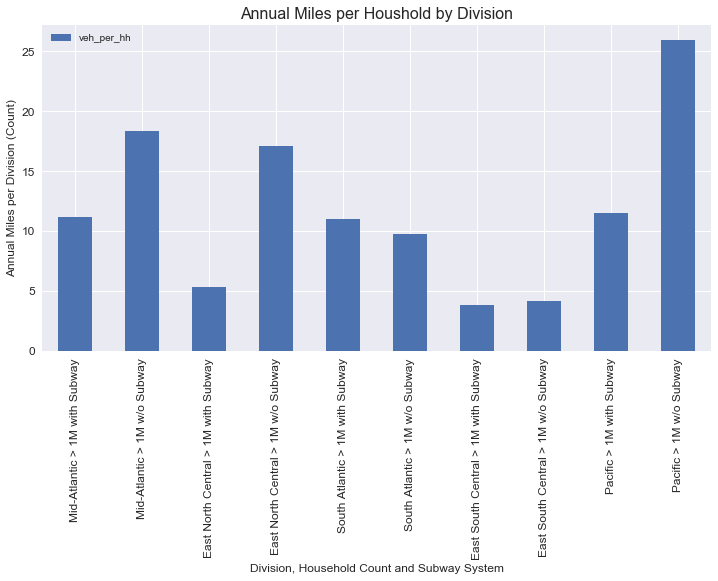

In [8]:
# Join NHTS trip with HH data to analyze total weighted trips per HH
veh_hh_21 = pd.merge(vehpub, hh_21, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_22 = pd.merge(vehpub, hh_22, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_31 = pd.merge(vehpub, hh_31, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_32 = pd.merge(vehpub, hh_32, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_51 = pd.merge(vehpub, hh_51, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_52 = pd.merge(vehpub, hh_52, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_62 = pd.merge(vehpub, hh_62, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_63 = pd.merge(vehpub, hh_63, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_91 = pd.merge(vehpub, hh_91, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_92 = pd.merge(vehpub, hh_92, left_on='HOUSEID', right_on='HOUSEID')

# NHTS annual miles by state and weighted total
veh_21_weight_sum = veh_hh_21['ANNMILES'].sum()
veh_22_weight_sum = veh_hh_22['ANNMILES'].sum()
veh_31_weight_sum = veh_hh_31['ANNMILES'].sum()
veh_32_weight_sum = veh_hh_32['ANNMILES'].sum()
veh_51_weight_sum = veh_hh_51['ANNMILES'].sum()
veh_52_weight_sum = veh_hh_52['ANNMILES'].sum()
veh_62_weight_sum = veh_hh_62['ANNMILES'].sum()
veh_63_weight_sum = veh_hh_63['ANNMILES'].sum()
veh_91_weight_sum = veh_hh_91['ANNMILES'].sum()
veh_92_weight_sum = veh_hh_92['ANNMILES'].sum()

# Calculate weighted trip per household by state
veh_per_hh_21 = veh_21_weight_sum / hh_21_weight_sum
veh_per_hh_22 = veh_22_weight_sum / hh_22_weight_sum
veh_per_hh_31 = veh_31_weight_sum / hh_31_weight_sum
veh_per_hh_32 = veh_32_weight_sum / hh_32_weight_sum
veh_per_hh_51 = veh_51_weight_sum / hh_51_weight_sum
veh_per_hh_52 = veh_52_weight_sum / hh_52_weight_sum
veh_per_hh_62 = veh_62_weight_sum / hh_62_weight_sum
veh_per_hh_63 = veh_63_weight_sum / hh_63_weight_sum
veh_per_hh_91 = veh_91_weight_sum / hh_91_weight_sum
veh_per_hh_92 = veh_92_weight_sum / hh_92_weight_sum

# Create dataframe for trips by division
veh_hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'veh_per_hh': [
        veh_per_hh_21,
        veh_per_hh_22,
        veh_per_hh_31,
        veh_per_hh_32,
        veh_per_hh_51,
        veh_per_hh_52,
        veh_per_hh_62,
        veh_per_hh_63,
        veh_per_hh_91,
        veh_per_hh_92
    ]
}
veh_hh_divisions_plot = pd.DataFrame(
    veh_hh_divisions,
    columns = ['division', 'veh_per_hh']
)

ax = veh_hh_divisions_plot[['veh_per_hh']].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Annual Miles per Houshold by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Annual Miles per Division (Count)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Commute Time per Household by Census Divisions

The average commute time per household by division were calculated to identify commute trends; as a result, the trips table was sorted as follows:

1. The households within each selected division were matched with trip values.
2. The commute time for each joined value were totaled, then divided by total households.
3. Result was average commute time per household by division.

Results were plotted in chart below with the following observations:

1. Average Commute: Higher commute times were observed in all divisions with access to a subway system which may be a result of them being located in urban areas with higher traffic congestion. In addition, this observation implies that subway systems are having an impact in reducing commute time within areas that already have high traffic congestion.
2. Commute Time Distribution: Average commute time was slightly higher in the Pacific/Atlantic divisions and lower in the Central regions. This observation implies that the Pacific/Atlantic divisions have more urban areas with shorter distances, whereas the Central divisions have more rural areas with longer distances.

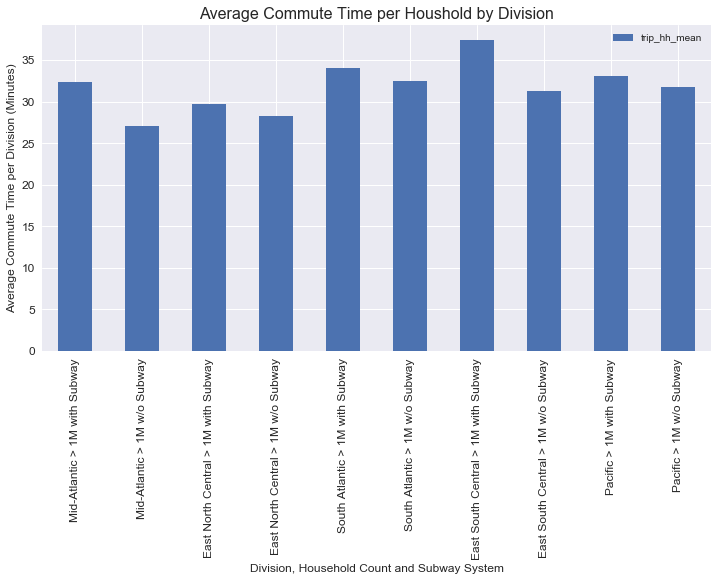

In [9]:
# Join NHTS trip with HH data to analyze total weighted trips per HH
trip_hh_21 = pd.merge(trippub, hh_21, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_22 = pd.merge(trippub, hh_22, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_31 = pd.merge(trippub, hh_31, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_32 = pd.merge(trippub, hh_32, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_51 = pd.merge(trippub, hh_51, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_52 = pd.merge(trippub, hh_52, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_62 = pd.merge(trippub, hh_62, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_63 = pd.merge(trippub, hh_63, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_91 = pd.merge(trippub, hh_91, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_92 = pd.merge(trippub, hh_92, left_on='HOUSEID', right_on='HOUSEID')

# NHTS annual miles by state and weighted total
trip_hh_21['COMMUTE'] = trip_hh_21['ENDTIME'] - trip_hh_21['STRTTIME']
trip_hh_22['COMMUTE'] = trip_hh_22['ENDTIME'] - trip_hh_22['STRTTIME']
trip_hh_31['COMMUTE'] = trip_hh_31['ENDTIME'] - trip_hh_31['STRTTIME']
trip_hh_32['COMMUTE'] = trip_hh_32['ENDTIME'] - trip_hh_32['STRTTIME']
trip_hh_51['COMMUTE'] = trip_hh_51['ENDTIME'] - trip_hh_51['STRTTIME']
trip_hh_52['COMMUTE'] = trip_hh_52['ENDTIME'] - trip_hh_52['STRTTIME']
trip_hh_62['COMMUTE'] = trip_hh_62['ENDTIME'] - trip_hh_62['STRTTIME']
trip_hh_63['COMMUTE'] = trip_hh_63['ENDTIME'] - trip_hh_63['STRTTIME']
trip_hh_91['COMMUTE'] = trip_hh_91['ENDTIME'] - trip_hh_91['STRTTIME']
trip_hh_92['COMMUTE'] = trip_hh_92['ENDTIME'] - trip_hh_92['STRTTIME']

trip_hh_mean_21 = trip_hh_21['COMMUTE'].mean()
trip_hh_mean_22 = trip_hh_22['COMMUTE'].mean()
trip_hh_mean_31 = trip_hh_31['COMMUTE'].mean()
trip_hh_mean_32 = trip_hh_32['COMMUTE'].mean()
trip_hh_mean_51 = trip_hh_51['COMMUTE'].mean()
trip_hh_mean_52 = trip_hh_52['COMMUTE'].mean()
trip_hh_mean_62 = trip_hh_62['COMMUTE'].mean()
trip_hh_mean_63 = trip_hh_63['COMMUTE'].mean()
trip_hh_mean_91 = trip_hh_91['COMMUTE'].mean()
trip_hh_mean_92 = trip_hh_92['COMMUTE'].mean()

# Create dataframe for trips by division
trip_hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'trip_hh_mean': [
        trip_hh_mean_21,
        trip_hh_mean_22,
        trip_hh_mean_31,
        trip_hh_mean_32,
        trip_hh_mean_51,
        trip_hh_mean_52,
        trip_hh_mean_62,
        trip_hh_mean_63,
        trip_hh_mean_91,
        trip_hh_mean_92
    ]
}
trip_hh_divisions_plot = pd.DataFrame(
    trip_hh_divisions,
    columns = ['division', 'trip_hh_mean']
)

ax = trip_hh_divisions_plot[['trip_hh_mean']].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Average Commute Time per Houshold by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Average Commute Time per Division (Minutes)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

In [11]:
# Export summary data to csv files.
hh_divisions_plot.to_csv('./draft/hh_divisions_plot.csv')
tr_hh_divisions_plot.to_csv('./draft/tr_hh_divisions_plot.csv')
veh_hh_divisions_plot.to_csv('./draft/veh_hh_divisions_plot.csv')
trip_hh_divisions_plot.to_csv('./draft/trip_hh_divisions_plot.csv')